In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
T = 0.100                          #  Time duration of simulation
urest = -0.000                     #  Resting Potential
thresh = 0.001                     #  Threshold Voltage for Spike
R = 2000                           #  Resistance
C = 5 * (10**(-6))                 #  Capacitance
_R = 1 / R                         #  Inverse of Resistance
dt = 0.00002                       #  Assumed dt(can be considered as step)
time = np.arange(0, T+dt, dt)      #  array of time
w = (np.pi / 180) * 75 * 1000      #  omega is in deg/msec
w1 = (np.pi / 180) * 30 * 1000     #  omega1 is in deg/msec
w2 = (np.pi / 180) * 45 * 1000     #  omega2 is in deg/msec
w3 = (np.pi / 180) * 60 * 1000     #  omega3 is in deg/msec
trefrac = 0.005

In [32]:
def I1():
    i = np.zeros(len(time))
    i[1250:3250] = 1.5 * (10**(-6))
    return i

def I2():
    i = np.zeros(len(time))
    i[0:] = 0.75 * (10**(-6))
    return i

def I3():
    i = np.zeros(len(time))
    for j in range(1, len(time)):
        i[j] = 5 * np.sin(w * time[j]) * (10**(-6))
    return i

def I4():
    i = np.zeros(len(time))
    for j in range(1, len(time)):
        i[j] = ((-2) * np.sin(w1 * time[j]) + 3 * np.sin(w2 * time[j]) + np.cos(w3 * time[j])) * (10**(-6))
    return i

def _I(id):
    switch = {
        1: I1,
        2: I2,
        3: I3,
        4: I4
    }
    
    return switch.get(id, "Nothing")

I = _I(2)()
print(I)
time[250]

[7.5e-07 7.5e-07 7.5e-07 ... 7.5e-07 7.5e-07 7.5e-07]


0.005

In [33]:
def LIF(I):
    # VOLTAGE
    V       =   np.empty(len(time))         # array for saving Voltage history
    V[0]    =   urest                       # set initial to resting potential
    ######### Measurements
    spikes  =   0                           # counter for number of spikes
    k = 0
    ######### Simulation
    for i in range(1, len(time)):
        if k != 0:
            k = k - 1
            V[i] = 0
            continue
        # use "I - V/R = C * dV/dT" to get this equation, here dV is actually (dV/dT)
        dV =  (I[i] - _R*(V[i-1]-urest))/C
        V[i] = V[i-1] + dV*dt

        # in case we exceed threshold
        if V[i] > thresh:
            V[i-1] = 0.001   # set the last step to spike value
            V[i] = urest       # current step is resting membrane potential
            spikes += 1     # count spike
            k = 250 #5 miliseconds

    return V

print(np.min(LIF(I)))

# print(I[1250], C)
# print(I[1250]/C)
# print((I[1250] - _R*(0-urest))/C)

-0.0


In [11]:
####   LIF with runge kutta method



In [34]:
def start_lif_sim(id):
    I = _I(id)() 
    V = LIF(I) * 1000
    
    I = I * 1000000   #   For plotting purposes
    
    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title("Leaky Integrate-and-Fire Neuron Simulation")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot(time, V, label="Membrane Potential")[0]
    line2 = plt.plot(time, I, label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [μA]")
    plt.xlabel("Time [s]")
    
    plt.show()

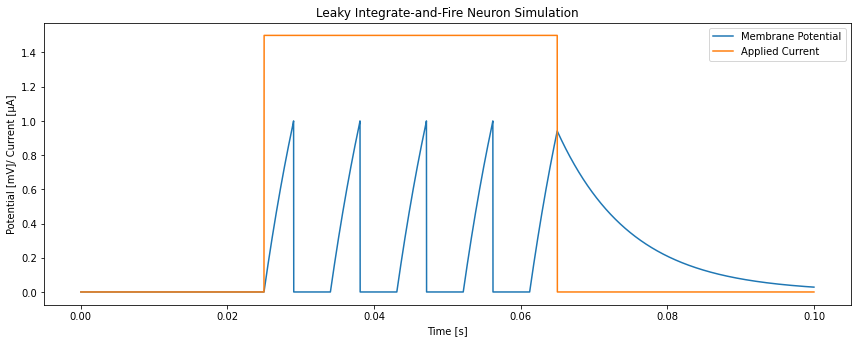

In [35]:
start_lif_sim(1)

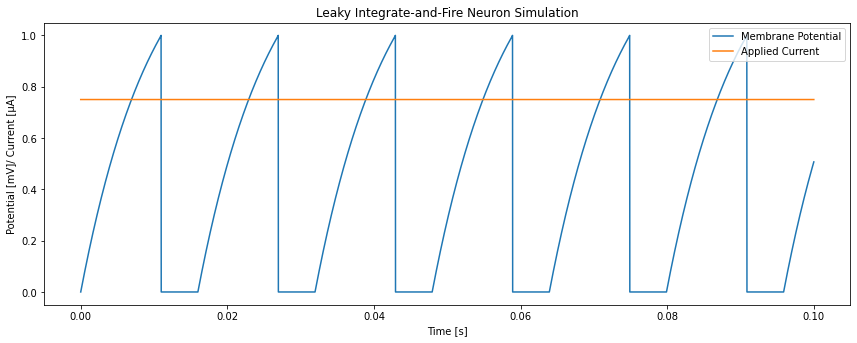

In [36]:
start_lif_sim(2)

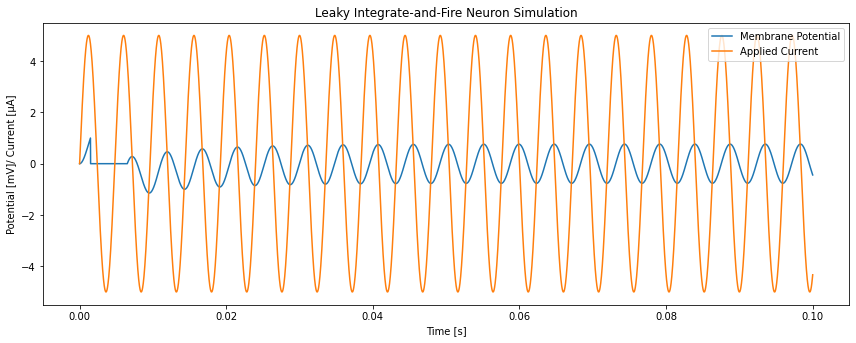

In [37]:
start_lif_sim(3)

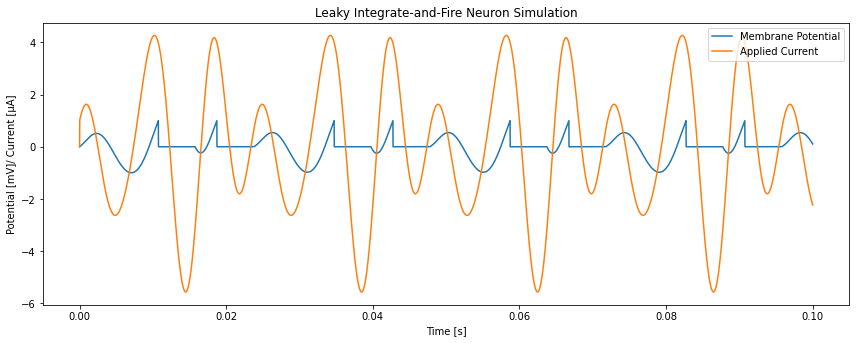

In [38]:
start_lif_sim(4)

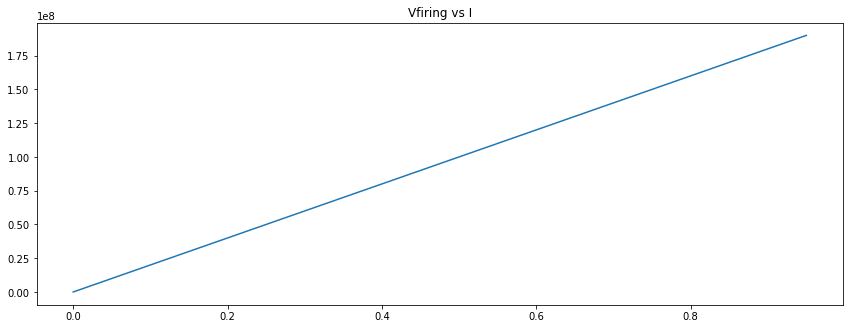

In [39]:
# Vfiring vs I
# Let for steady current, I
I = np.arange(0, 1, 0.05)

time_const = R * C
vfiring = np.empty(len(I))
for j in range(1, len(I)):
    vfiring[j] = 1 / (time_const * np.log((R * I[j]) / (R * I[j] - 0.001))) # this was the formula given in the paper

######### Plotting
axis_color = 'lightgoldenrodyellow'

fig = plt.figure("Vfiring vs I", figsize=(14, 7))
ax = fig.add_subplot(111)
plt.title("Vfiring vs I")
fig.subplots_adjust(left=0.1, bottom=0.32)

# plot lines
line = plt.plot(I, vfiring, label="Membrane Potential")[0]
plt.show()

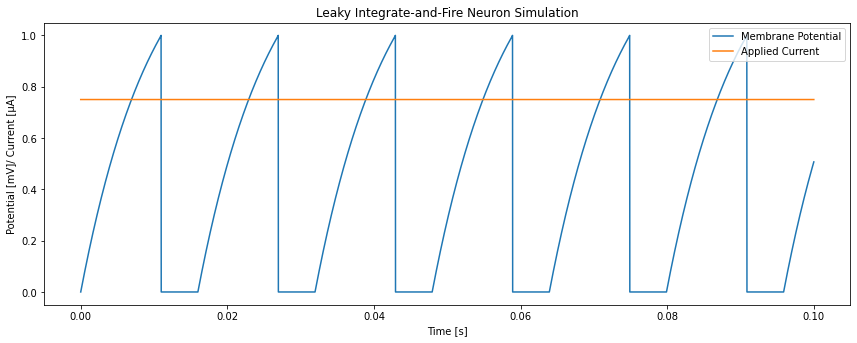

In [40]:
start_lif_sim(2)